In [2]:
import numpy as np
import scipy

In [3]:
def definir_Matriz(shape, seed=None):
    return np.random.randn(shape[0], shape[1])*2 - 1

Ejercicio 1 - Implementar descompLU: 

In [4]:
def descompLU(A):
    # Como no hay pivoteo, si A[0][0] es 0, debe tirar error
    if A[0][0] == 0:
        raise AssertionError('Error: hay un 0')
    # Caso Base
    if A.shape == (1,1):
        return 1, A[0][0] 

    # Busco los datos para armar mis matrices L y U
    u11 = A[0][0]
    U12 = A[0][1:]
    L21 = A[1:,0] / u11
    L22U22 = A[1:,1:] - np.outer(L21, U12)

    # empiezo a armar mi L, U de cada vuelta de la recursión
    L22, U22 = descompLU(L22U22)

    U = np.zeros(A.shape)
    U[0][0] = u11
    U[0][1:] = U12
    U[1:, 1:] = U22

    L = np.eye(A.shape[0])
    L[1:,0] = L21
    L[1:, 1:] = L22

    return L, U

Ejemplo de uso:

In [5]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
L, U = descompLU(A)

print(L,"\n")
print(U)

AssertionError: Error: hay un 0

In [6]:
def error_rel_n2(A,x,b):
    res = np.linalg.norm(A @ x.T -b,ord=2)/np.linalg.norm(b,ord=2)
    return res

In [7]:
def resolverLU(A, b):
    L, U = descompLU(A)
    y = scipy.linalg.solve_triangular(L,b, lower = True)
    res = scipy.linalg.solve_triangular(U, y)
    return res

In [8]:
def inversa(A):
    try:
        L, U = descompLU(A)
        In = np.eye(A.shape[0])
        y = scipy.linalg.solve_triangular(L, In, lower = True)
        res = scipy.linalg.solve_triangular(U, y)
        return res
    except scipy.linalg.LinAlgError:
        print('Error! Matriz Singular :,( ')

A = np.array([[1,2,3],[5,5,6],[7,8,9]])
inversa(A)

array([[-0.5       ,  1.        , -0.5       ],
       [-0.5       , -2.        ,  1.5       ],
       [ 0.83333333,  1.        , -0.83333333]])

In [9]:
A = definir_Matriz((10,10))
Ainv = inversa(A)
np.linalg.norm(Ainv@A - np.eye(A.shape[0]), ord='fro')

4.701037309301393e-15

In [45]:
import time
v1 = np.zeros(200)
tiempo1 = np.zeros(200)

# Buscamos errores para ResolverLU
for n in range(10, 201):
    suma_errores = 0
    start = time.time()
    for i in range(10):
        # Definimos la matriz A, x y b tal que Ax = b
        A = definir_Matriz((n,n))
        x = np.random.randn(n)*2-1
        b = A@x

        # Resolvemos el sistema Ax = b y calculamos el error
        x1 = resolverLU(A,b)
        suma_errores += np.log(error_rel_n2(A,x1,b))

    tiempo1[n-1] = time.time() - start
    v1[n-1] = suma_errores

In [46]:
import time
v2 = np.zeros(200)
tiempo2 = np.zeros(200)

# Buscamos errores para Inversa
for n in range(10, 201):
    suma_errores = 0
    start = time.time()
    for i in range(10):
        # Definimos la matriz A, x y b tal que Ax = b
        A = definir_Matriz((n,n))
        x = np.random.randn(n)*2-1
        b = A@x

        # Resolvemos el sistema Ax = b y calculamos el error
        x2 = inversa(A)@b
        suma_errores += np.log(error_rel_n2(A,x2,b))

    v2[n-1] = suma_errores
    tiempo2[n-1] = time.time() - start

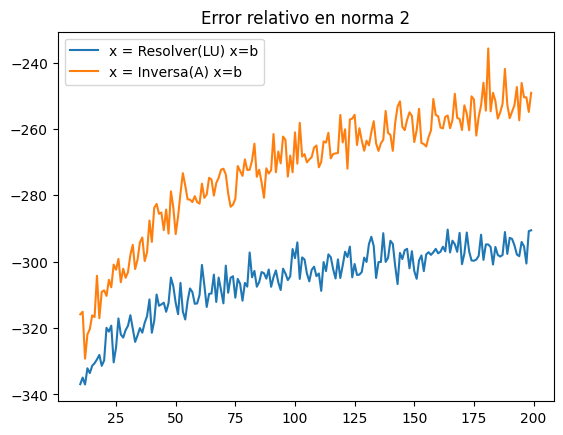

In [44]:
import matplotlib.pyplot as plt
n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='x = Resolver(LU) x=b')
plt.plot(n, v2[10:], label='x = Inversa(A) x=b')
plt.title('Error relativo en norma 2')

plt.legend()
plt.show()

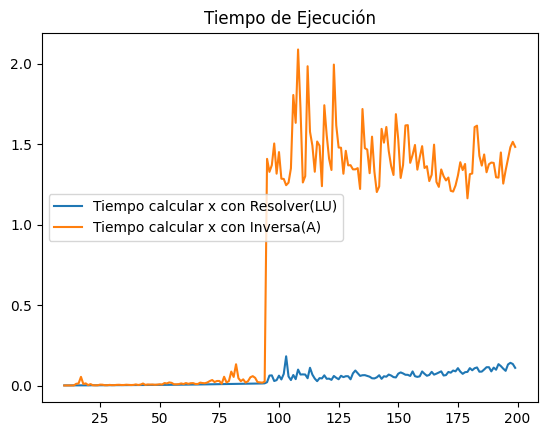

In [47]:
import matplotlib.pyplot as plt
n = np.arange(10, len(v1))
plt.plot(n, tiempo1[10:], label='Tiempo calcular x con Resolver(LU)')
plt.plot(n, tiempo2[10:], label='Tiempo calcular x con Inversa(A)')
plt.title('Tiempo de Ejecución')

plt.legend()
plt.show()

Creemos que al tener mas pasos el inversa, entonces es menos preciso.
- TODO: investigar porque tarda tanto mas la inversa

In [49]:
for i, tiempo in enumerate(tiempo2):
    if tiempo > 1:
        print(i)
        break

95
